In [103]:
# ! pip3 install bioinfokit 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from bioinfokit.analys import stat, get_data

In [144]:
all_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201214/22/34125832-学习行为看板-学习行为与转化-查询5.csv', encoding = 'gb18030')
all_data.loc[(all_data['d1_study_mins'] < 0), 'd1_study_mins'] = 0
all_data = all_data[all_data.active_dt <= '2020-11-30']
all_data['first_milestone_name'] = all_data['first_milestone_name'].fillna('未定级')
all_data.head()

,active_dt,user_id,first_milestone_name,d0_group_yn,d0_study_mins,d1_study_mins,d2_study_mins,d3_study_mins,d4_study_mins,d5_study_mins,d6_study_mins,d6_order_cnt
9543,2020-11-28,4.953978e+10,未定级,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9544,2020-11-28,7.096598e+10,未定级,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9545,2020-11-28,5.241633e+13,A0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9546,2020-11-28,5.241635e+13,未定级,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9547,2020-11-28,5.241640e+13,未定级,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [145]:
new_data = all_data.fillna(0)

new_data.loc[(new_data['d6_order_cnt'] > 0), 'vip_yn'] = 'Y'
new_data.loc[(new_data['d6_order_cnt'] == 0), 'vip_yn'] = 'N'

new_data.loc[(new_data['d0_study_mins'] > 45), 'd0_study_gt45'] = 1
new_data.loc[(new_data['d0_study_mins'] <= 45), 'd0_study_gt45'] = 0

new_data.loc[(new_data['d1_study_mins'] > 45), 'd1_study_gt45'] = 1
new_data.loc[(new_data['d1_study_mins'] <= 45), 'd1_study_gt45'] = 0

new_data.loc[(new_data['d2_study_mins'] > 45), 'd2_study_gt45'] = 1
new_data.loc[(new_data['d2_study_mins'] <= 45), 'd2_study_gt45'] = 0

new_data.loc[(new_data['d3_study_mins'] > 45), 'd3_study_gt45'] = 1
new_data.loc[(new_data['d3_study_mins'] <= 45), 'd3_study_gt45'] = 0

new_data.loc[(new_data['d4_study_mins'] > 45), 'd4_study_gt45'] = 1
new_data.loc[(new_data['d4_study_mins'] <= 45), 'd4_study_gt45'] = 0

new_data.loc[(new_data['d5_study_mins'] > 45), 'd5_study_gt45'] = 1
new_data.loc[(new_data['d5_study_mins'] <= 45), 'd5_study_gt45'] = 0

new_data.loc[(new_data['d6_study_mins'] > 45), 'd6_study_gt45'] = 1
new_data.loc[(new_data['d6_study_mins'] <= 45), 'd6_study_gt45'] = 0

new_data['days_study_gt45'] = new_data['d0_study_gt45'] + new_data['d1_study_gt45'] + new_data['d2_study_gt45'] + new_data['d3_study_gt45'] +new_data['d4_study_gt45'] + new_data['d5_study_gt45'] + new_data['d6_study_gt45'] 
new_data['daily_study_mins'] = (new_data['d0_study_mins'] + new_data['d1_study_mins'] + new_data['d2_study_mins'] + new_data['d3_study_mins'] +new_data['d4_study_mins'] + new_data['d5_study_mins'] + new_data['d6_study_mins'])/7 

new_data.loc[(new_data['daily_study_mins'] < 10), 'daily_study_mins_range'] = '1_<10m'
new_data.loc[(new_data['daily_study_mins'] <= 20) & (new_data['daily_study_mins'] >= 10) , 'daily_study_mins_range'] = '2_10~20m'
new_data.loc[(new_data['daily_study_mins'] <= 30) & (new_data['daily_study_mins'] >= 20) , 'daily_study_mins_range'] = '3_20~30m'
new_data.loc[(new_data['daily_study_mins'] <= 40) & (new_data['daily_study_mins'] > 30) , 'daily_study_mins_range'] = '4_30~40m'
new_data.loc[(new_data['daily_study_mins'] <= 50) & (new_data['daily_study_mins'] > 40) , 'daily_study_mins_range'] = '5_40~50m'
new_data.loc[(new_data['daily_study_mins'] <= 60) & (new_data['daily_study_mins'] > 50) , 'daily_study_mins_range'] = '6_50~60m'
new_data.loc[(new_data['daily_study_mins'] > 60), 'daily_study_mins_range'] = '7_>60m'

new_data.head()

,active_dt,user_id,first_milestone_name,d0_group_yn,d0_study_mins,d1_study_mins,d2_study_mins,d3_study_mins,d4_study_mins,d5_study_mins,...,d0_study_gt45,d1_study_gt45,d2_study_gt45,d3_study_gt45,d4_study_gt45,d5_study_gt45,d6_study_gt45,days_study_gt45,daily_study_mins,daily_study_mins_range
9543,2020-11-28,4.953978e+10,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_<10m
9544,2020-11-28,7.096598e+10,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_<10m
9545,2020-11-28,5.241633e+13,A0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_<10m
9546,2020-11-28,5.241635e+13,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_<10m
9547,2020-11-28,5.241640e+13,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1_<10m


In [146]:
new_data.sort_values(by=['daily_study_mins'])

,active_dt,user_id,first_milestone_name,d0_group_yn,d0_study_mins,d1_study_mins,d2_study_mins,d3_study_mins,d4_study_mins,d5_study_mins,...,d0_study_gt45,d1_study_gt45,d2_study_gt45,d3_study_gt45,d4_study_gt45,d5_study_gt45,d6_study_gt45,days_study_gt45,daily_study_mins,daily_study_mins_range
9543,2020-11-28,4.953978e+10,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1_<10m
202410,2020-10-16,3.690603e+14,A0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1_<10m
202411,2020-10-16,3.690604e+14,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1_<10m
202412,2020-10-16,4.042449e+14,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1_<10m
202414,2020-10-16,4.394291e+14,未定级,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1_<10m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202146,2020-10-16,1.402616e+15,A1高,0,402,422.0,361.0,343.0,117.0,210.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,265.000000,7_>60m
225318,2020-10-08,1.917147e+15,A1初,1,259,360.0,441.0,535.0,83.0,108.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,271.285714,7_>60m
50978,2020-11-29,3.412515e+15,A0,0,471,454.0,820.0,406.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,307.285714,7_>60m
131765,2020-10-28,1.670886e+15,A2初,1,135,282.0,381.0,366.0,304.0,397.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,326.000000,7_>60m


In [147]:
chi_data = new_data.groupby(['vip_yn', 'daily_study_mins_range']).size().reset_index(name='count')
# chi_data = chi_data.set_index('daily_study_mins_range')
chi_data

,vip_yn,daily_study_mins_range,count
0,N,1_<10m,322753
1,N,2_10~20m,17193
2,N,3_20~30m,5206
3,N,4_30~40m,1691
4,N,5_40~50m,690
5,N,6_50~60m,322
6,N,7_>60m,410
7,Y,1_<10m,654
8,Y,2_10~20m,1131
9,Y,3_20~30m,1400


In [148]:
res = stat()
res.chisq(df = chi_data.pivot(index = 'daily_study_mins_range', columns = 'vip_yn', values = 'count'))
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            6       88890.1          0
Log-likelihood     6       25639.1          0



In [149]:
new_data.groupby(['vip_yn', 'days_study_gt45']).size().reset_index(name='count')

,vip_yn,days_study_gt45,count
0,N,0.0,329819
1,N,1.0,12571
2,N,2.0,3647
3,N,3.0,1420
4,N,4.0,561
5,N,5.0,201
6,N,6.0,36
7,N,7.0,10
8,Y,0.0,2216
9,Y,1.0,1193


In [159]:
time_cr = new_data.groupby(['vip_yn', 'daily_study_mins']).size().reset_index(name='count')
time_cr.to_csv(r'./study_duration_cr.csv', encoding='utf_8_sig')

#### 日均学习时长分布

Text(0.5, 0, 'Study Duration: mins')

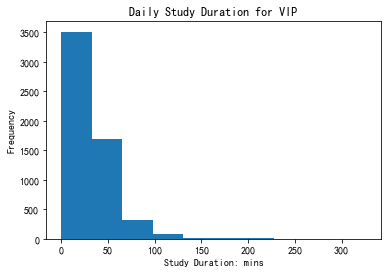

In [153]:
new_data[(new_data.vip_yn == 'Y')].daily_study_mins.plot(kind='hist')
plt.title('Daily Study Duration for VIP')
plt.xlabel('Study Duration: mins')

Text(0.5, 0, 'Study Duration: mins')

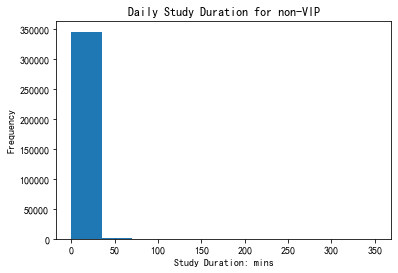

In [154]:
new_data[(new_data.vip_yn == 'N')].daily_study_mins.plot(kind='hist')
plt.title('Daily Study Duration for non-VIP')
plt.xlabel('Study Duration: mins')

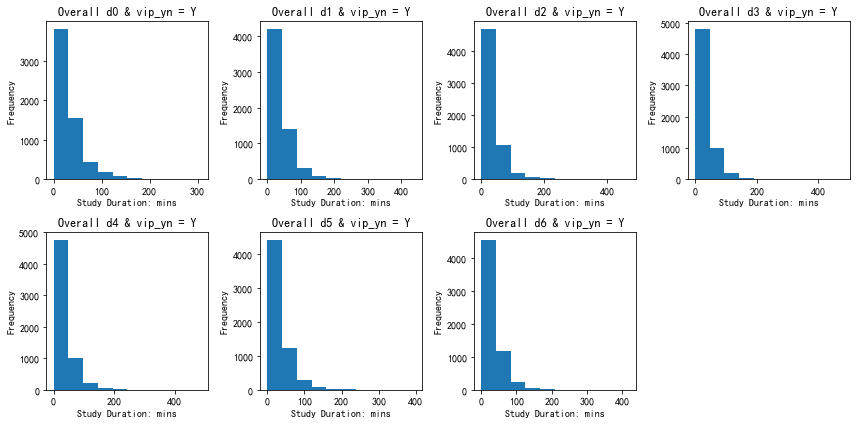

In [72]:
mile_stone = 'Overall'
vip_yn = 'Y'
# plot_data = new_data[(new_data.first_milestone_name == mile_stone) & (new_data.d6_order_cnt == d6_order)]

plot_data = new_data[(new_data.vip_yn == vip_yn)]

plt.figure(figsize=(12,6))

plt.subplot(241)
plot_data.d0_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d0' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(242)
plot_data.d1_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d1' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(243)
plot_data.d2_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d2' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(244)
plot_data.d3_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d3' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(245)
plot_data.d4_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d4' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(246)
plot_data.d5_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d5' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.subplot(247)
plot_data.d6_study_mins.plot(kind='hist')
plt.title(mile_stone + ' d6' + ' & ' + 'vip_yn = ' + vip_yn)
plt.xlabel('Study Duration: mins')

plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

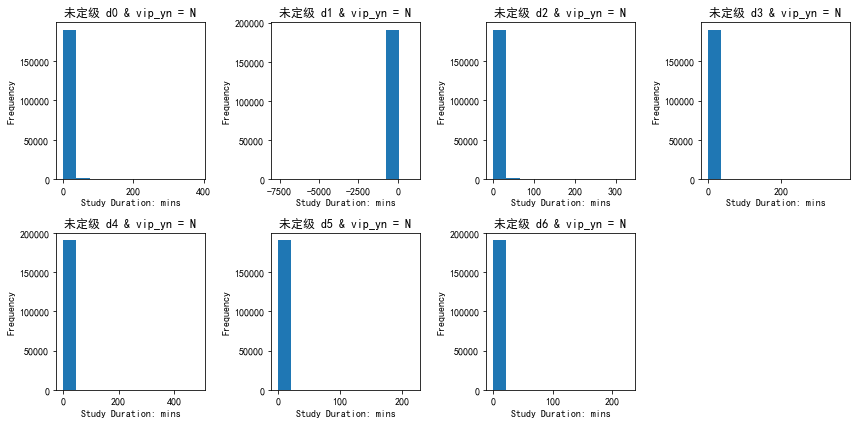

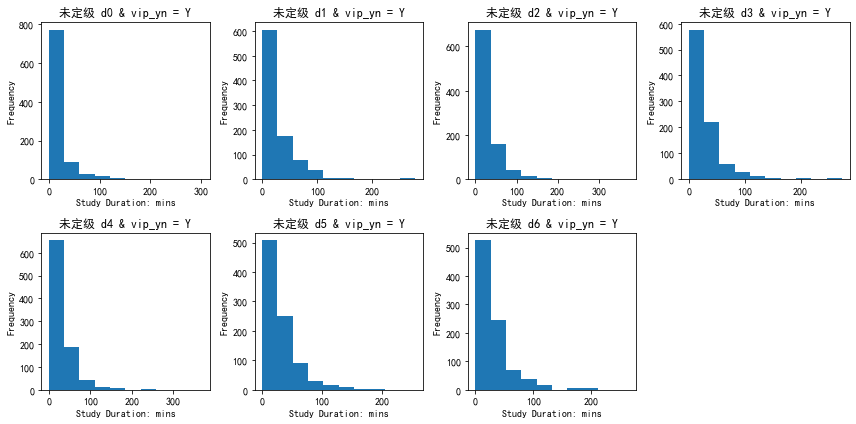

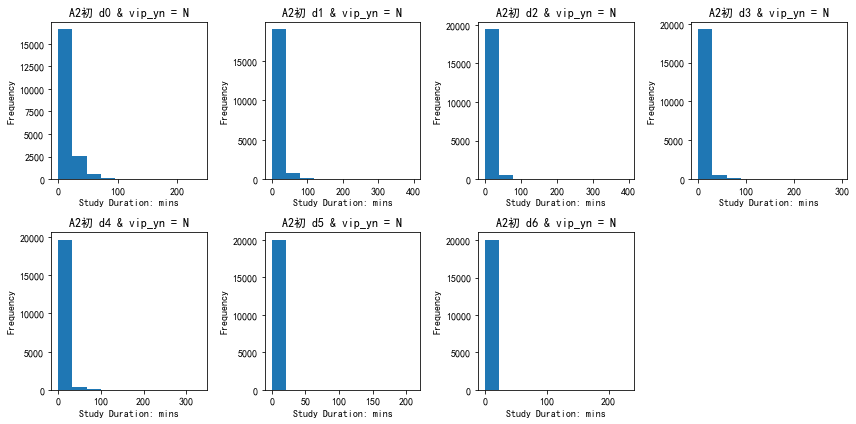

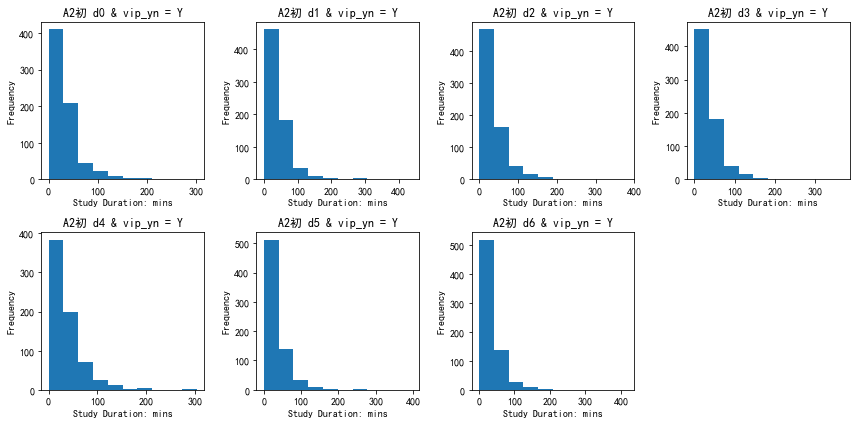

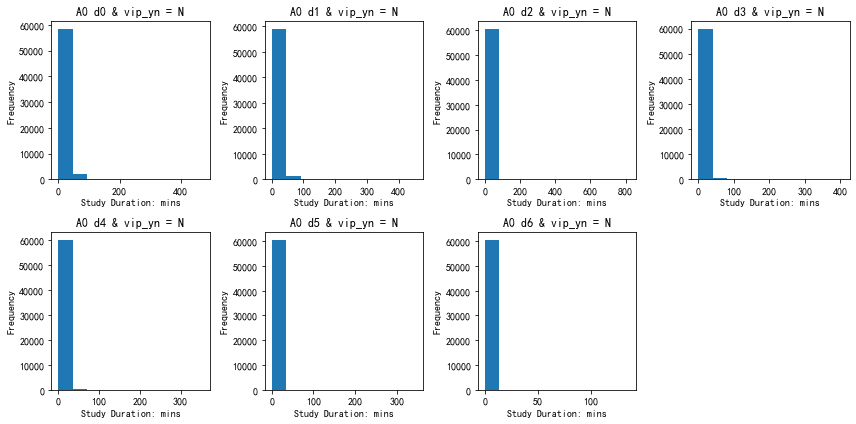

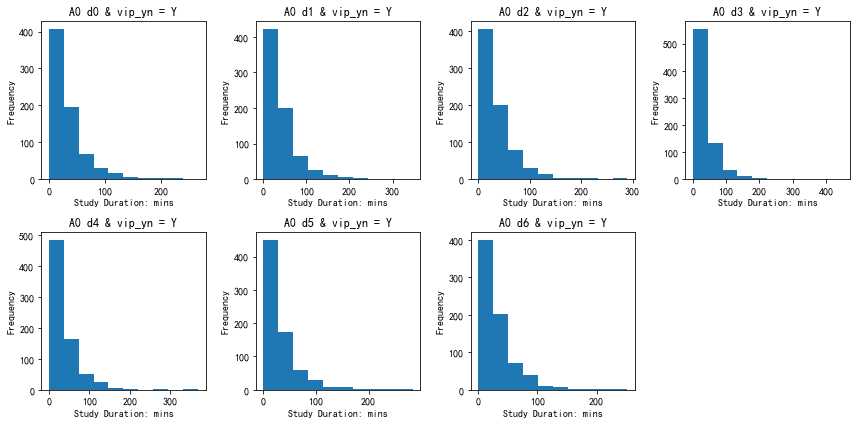

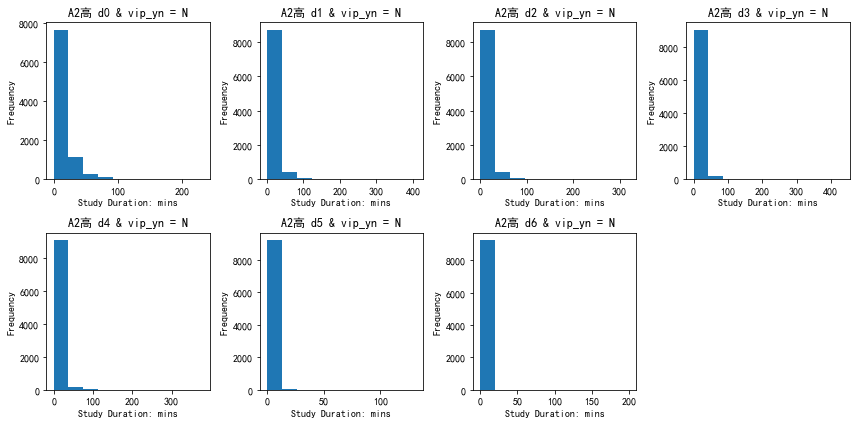

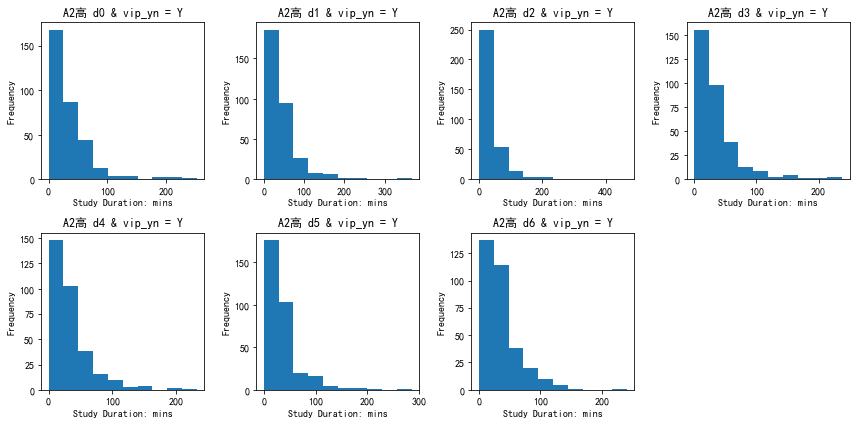

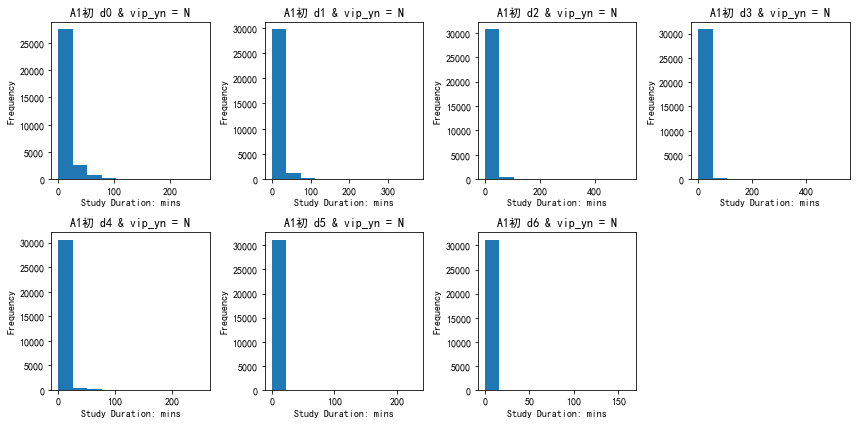

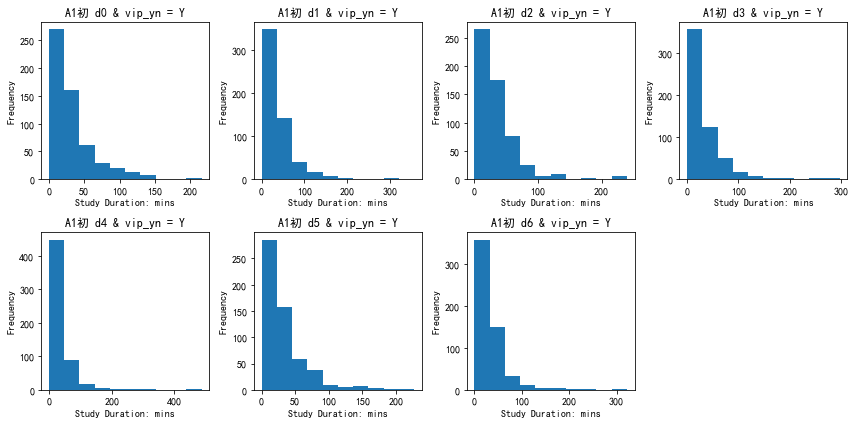

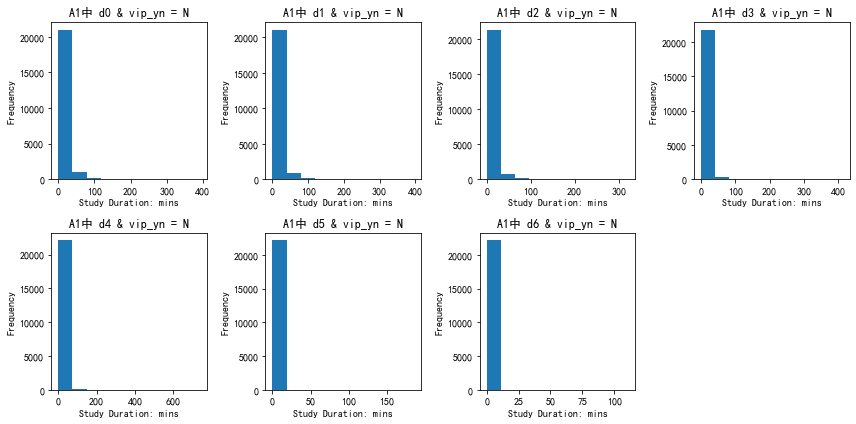

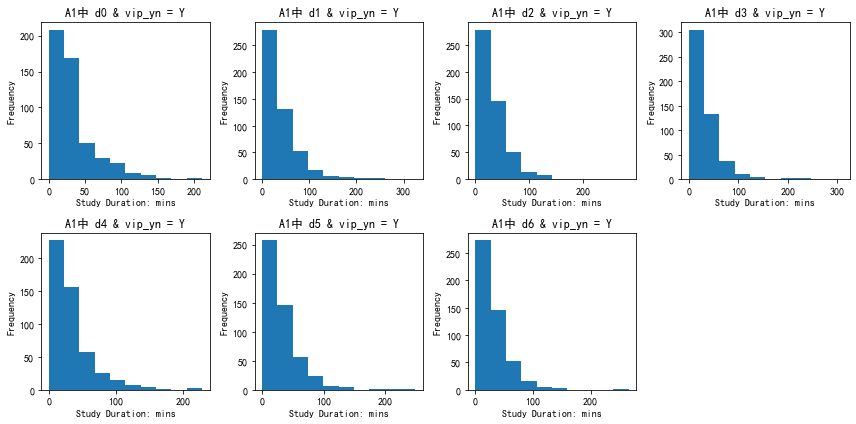

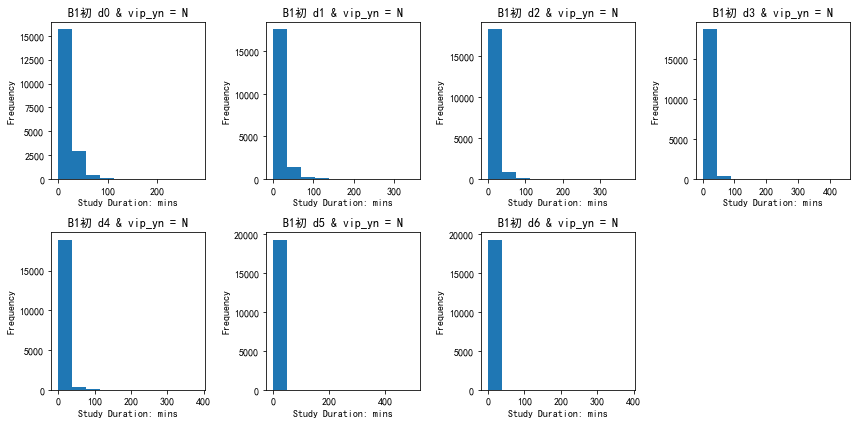

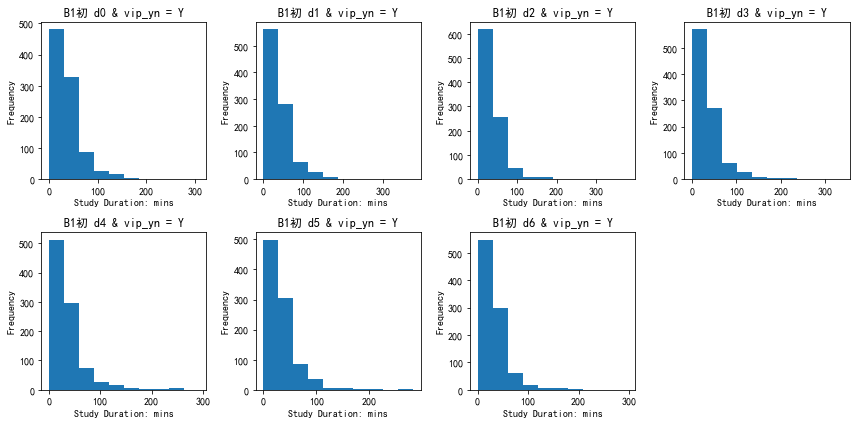

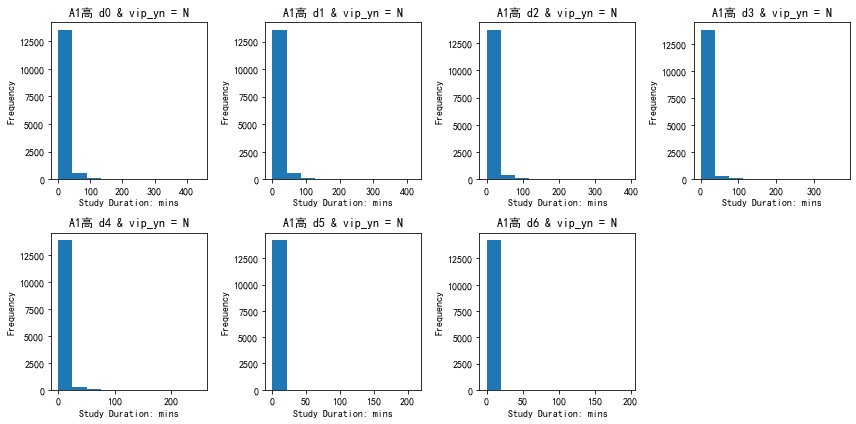

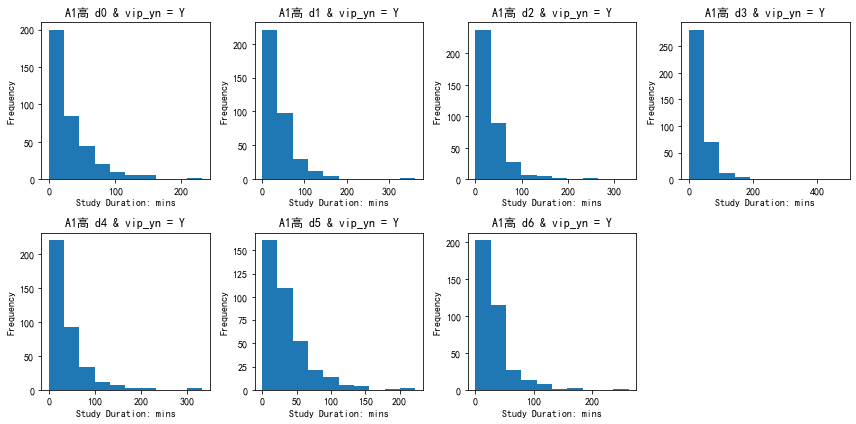

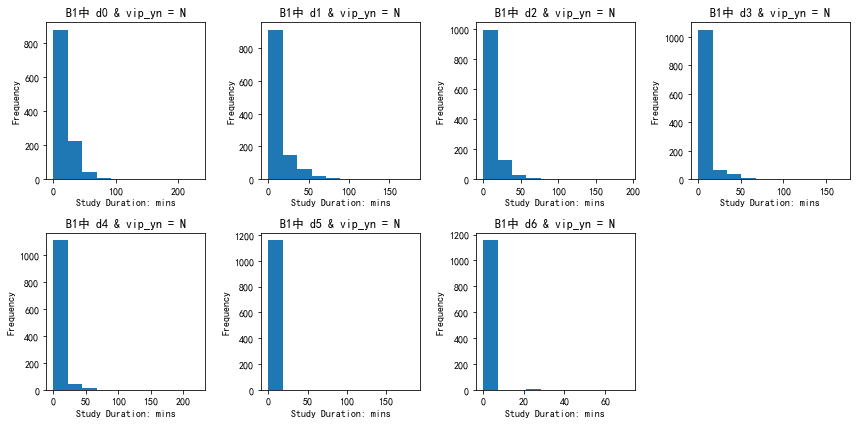

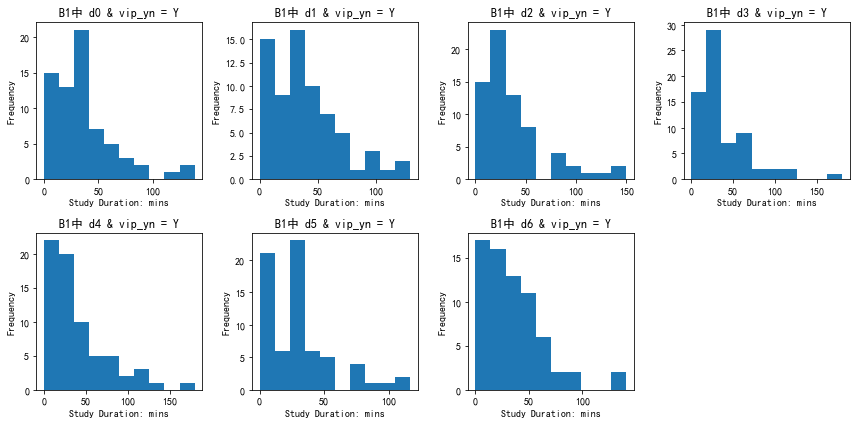

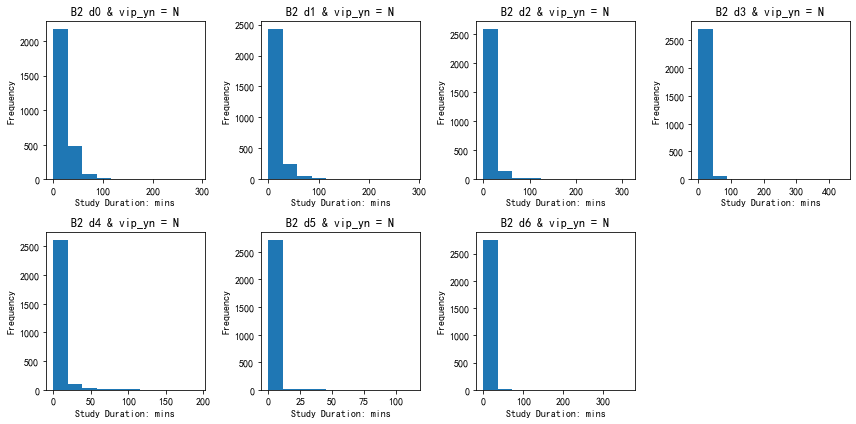

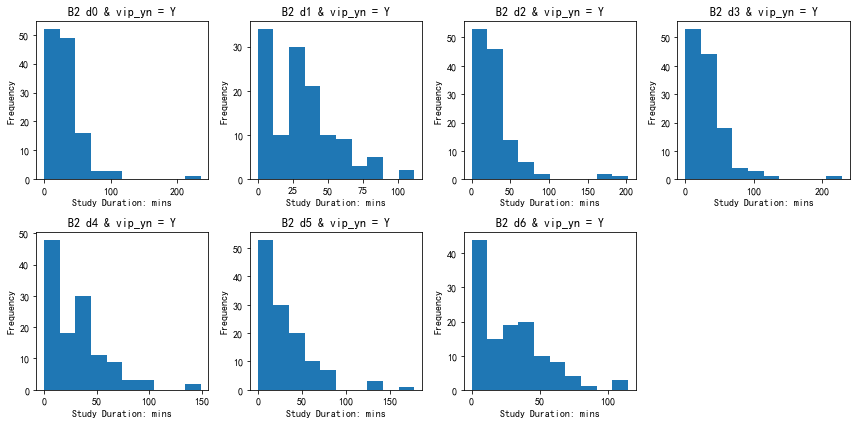

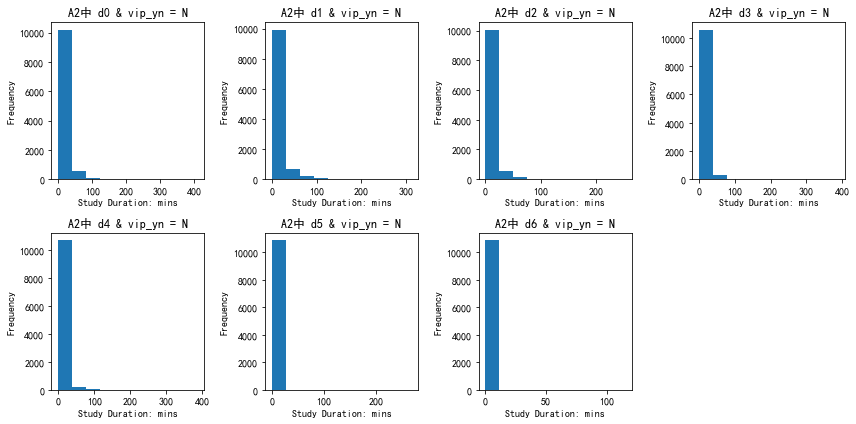

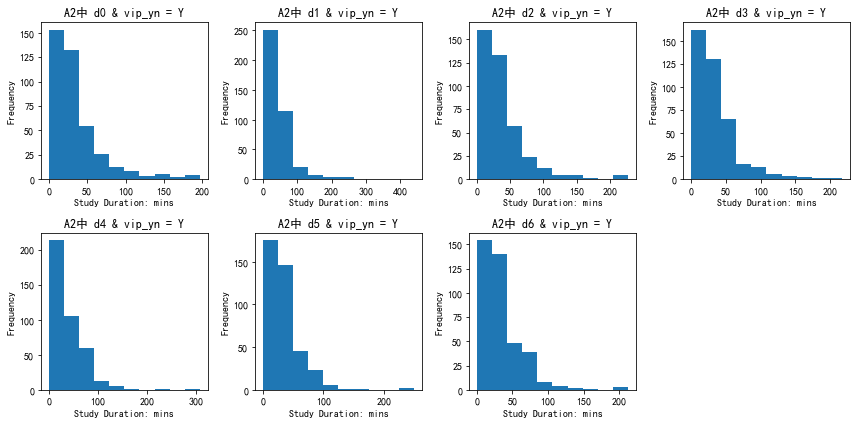

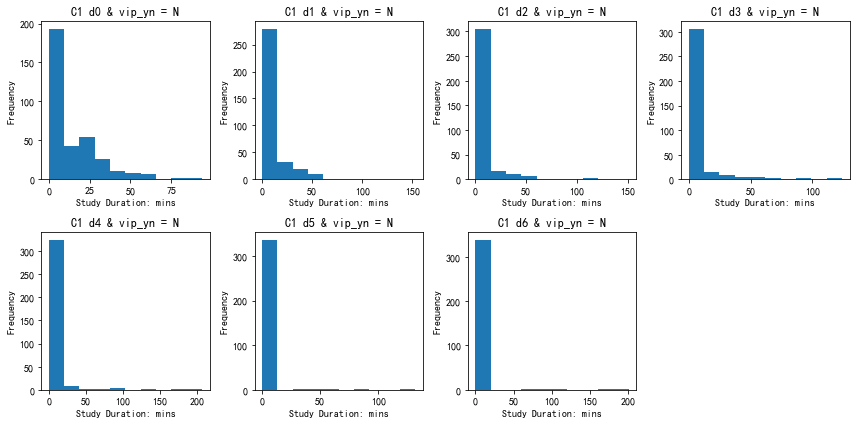

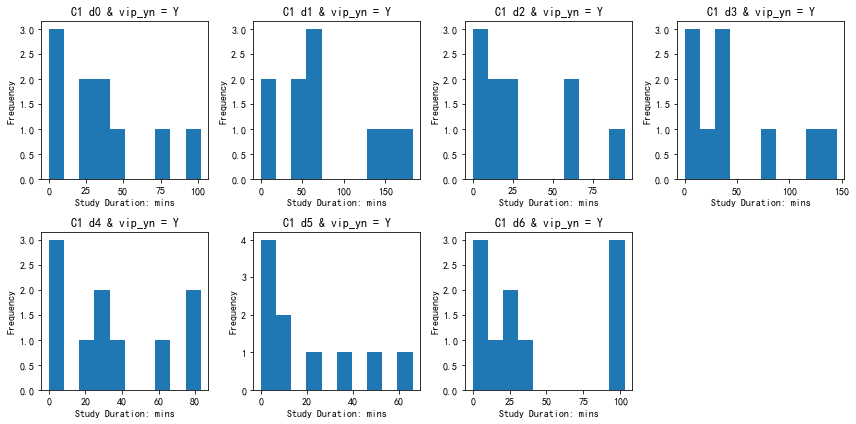

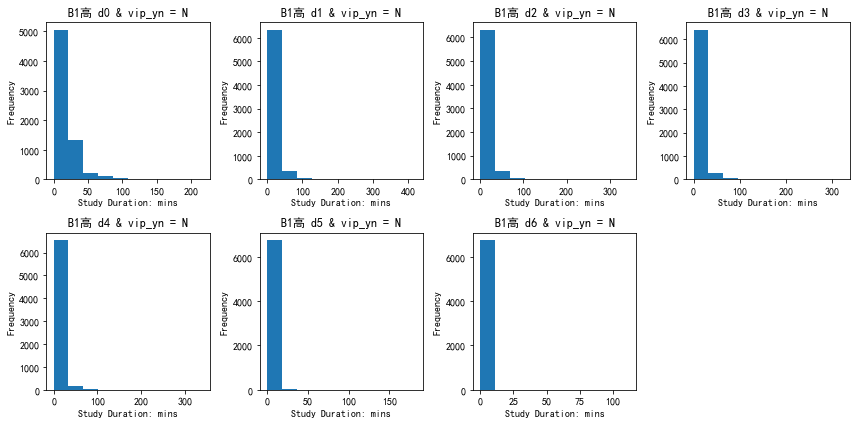

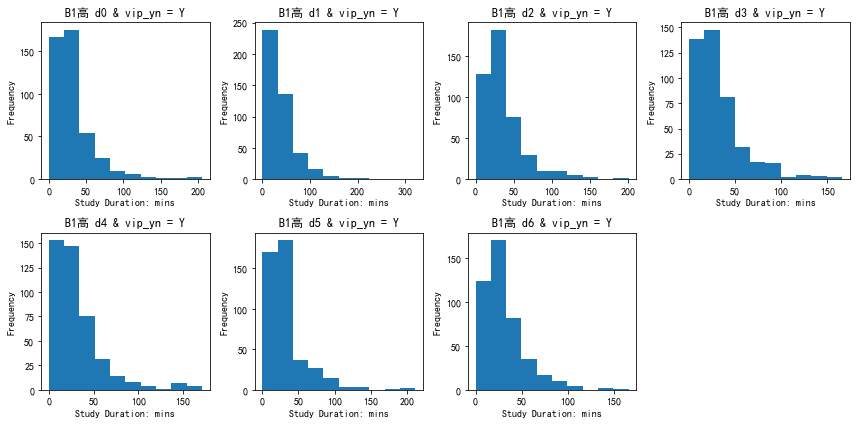

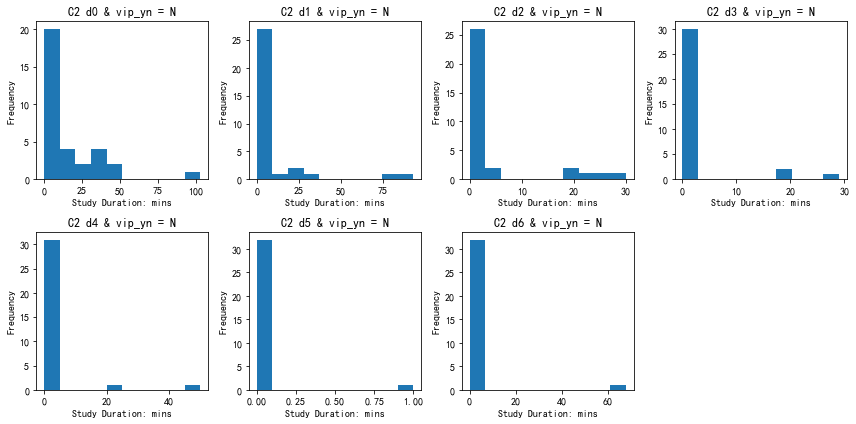

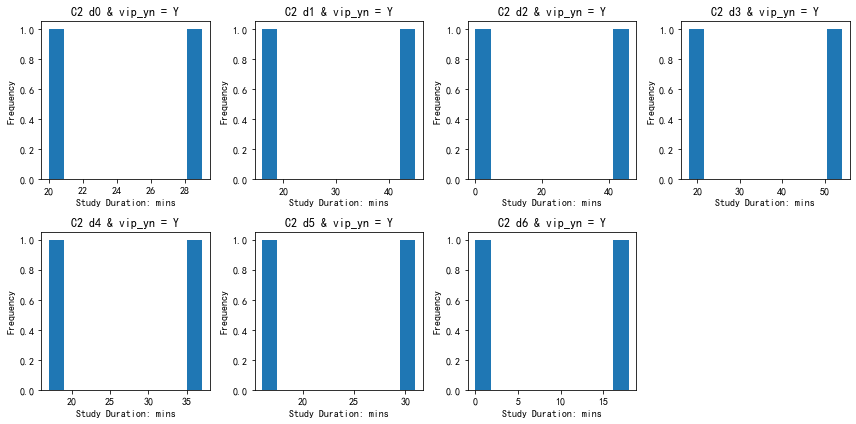

In [73]:
mile_stone_list = new_data.first_milestone_name.unique()
vip_yn_list = new_data.vip_yn.unique()

for mile_stone in mile_stone_list:
    for vip_yn in vip_yn_list:
        
        plot_data = new_data[(new_data.first_milestone_name == mile_stone) & (new_data.vip_yn == vip_yn)]
        plt.figure(figsize=(12,6))

        plt.subplot(241)
        plot_data.d0_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d0' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(242)
        plot_data.d1_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d1' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(243)
        plot_data.d2_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d2' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(244)
        plot_data.d3_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d3' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(245)
        plot_data.d4_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d4' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(246)
        plot_data.d5_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d5' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.subplot(247)
        plot_data.d6_study_mins.plot(kind='hist')
        plt.title(mile_stone + ' d6' + ' & ' + 'vip_yn = ' + vip_yn)
        plt.xlabel('Study Duration: mins')

        plt.tight_layout()